<a href="https://colab.research.google.com/github/shannonlal/Statistical-YCBS-255/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2  <font color="blue"> (15 points) </font>
 
***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [1]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://faculty.marshall.usc.edu/gareth-james/ISL/data.html> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

In [5]:
# Load Libraries
import numpy as np
import pandas as pd
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Part A - Q1: Load the data
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


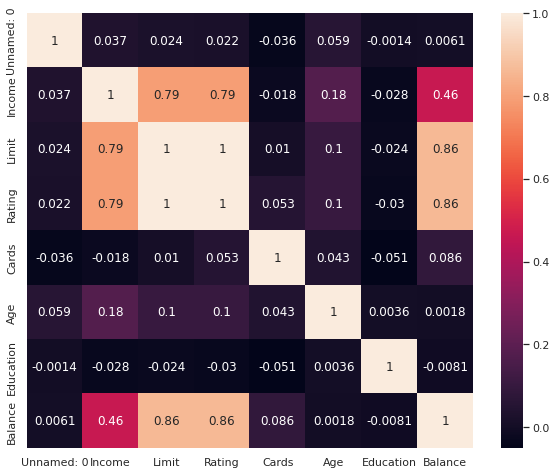

In [7]:

# Convert into a Panda
credit_data = pd.read_csv('Credit.csv')

# Display the first elements
credit_data.head()

# Describe the Data Set
credit_data.describe()

## SHANNON CHANGE VARIABLE NAMES:
corrMatrix = credit_data.corr()
sns.heatmap(corrMatrix, annot=True)
sns.set(rc = {'figure.figsize':(10,8)})
plt.show()


#NOTES For summary
# 1 is directly correpondin
# Number close to 1 is high collecation
# Low number not much correclation
# - negative explains the direction

# What are potential relationships with the data
## Todo
## How many rows?  Are there any null values?
## Plot a quick linear regression against the different axis
## Pandas example.  Can get the mean of a column and standard devaiation
## Good practice to plot some histograms of histograms, married gender, eduation 
## df describe function gives a bunch of data


In [10]:
# Part A: Q2 - Clean data
# Keep the following columns and drop remaining ( Income, Limit, Rating, Cards, Age, Education, and Balance)
# Need to drop, Unnamed: 0, Geneder, Student, Married, Ethnicity

credit_data.drop('Unnamed: 0', axis=1, inplace=True)
credit_data.drop('Gender', axis=1, inplace=True)
credit_data.drop('Student', axis=1, inplace=True)
credit_data.drop('Married', axis=1, inplace=True)
credit_data.drop('Ethnicity', axis=1, inplace=True)



In [11]:
# Part A: Q 2 - Analyze the data
# List top 5 records
credit_data.head()

# Assert the shape is 400 rows and 7 columns
assert credit_data.shape == (400,7)

# Check if there are any null values in entire data frame
assert credit_data.isnull().values.any() == False




,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [12]:
# Part A: Q3 - Create a binary variable to indicate the balance

## Step 1: Create a lambda function
def balance_high(row):
  if row['Balance'] > 1500: 
    return 1
  else:
    return 0

df_test_1 = {'Balance':1501}
assert balance_high( df_test_1 ) == True
df_test_2 = {'Balance':1499}
assert balance_high( df_test_2 ) == False

credit_data['Balance_1500'] = credit_data.apply( balance_high, axis =1 )
credit_data = credit_data.astype({'Balance_1500': int})
credit_data.head()
credit_data.shape


## Alternative way to do this.  TODO
## credit_data['Balance_1500'] = np.where(credit_data['Balance'] > 1500, 1, 0)
# Test Case
high_balance_count = 0
for balance_score in credit_data.Balance_1500:
  if balance_score == 1:
    high_balance_count+=1

print(bcolors.RED + "In the data set the total number of high balance candidates is :" + bcolors.ENDC, high_balance_count) 



,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
0,14.891,3606,283,2,34,11,333,0
1,106.025,6645,483,3,82,15,903,0
2,104.593,7075,514,4,71,11,580,0
3,148.924,9504,681,3,36,11,964,0
4,55.882,4897,357,2,68,16,331,0


(400, 8)

In the data set the total number of high balance candidates is : 9


In [20]:
# Part A: Q4 - Prepare the data
from sklearn.metrics import confusion_matrix
X = credit_data[['Income','Limit','Rating','Cards','Age','Education']]
y = credit_data['Balance_1500']



In [21]:
# Part A: Q4 - Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=4000)
lr.fit(X, y)

print(bcolors.RED + "The Intercept for the Logistic Regression Model is :" + bcolors.ENDC, lr.intercept_) 
print(bcolors.RED + "The Coefficents for the Logistic Regression Model are :" + bcolors.ENDC, lr.coef_) 

LogisticRegression(max_iter=4000)

The Intercept for the Logistic Regression Model is : [-16.77144268]
The Coefficents for the Logistic Regression Model are : [[-0.08381135  0.00186085  0.01244322  0.11159392 -0.02029975 -0.07713963]]


In [23]:
# Part A: Q4 - Build Linear Discriminant Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

print(bcolors.RED + "The Intercept for the Linear Discriminant Analysis Model is :" + bcolors.ENDC, lda.intercept_) 
print(bcolors.RED + "The Coefficents for the Linear Discriminant Analysis Model are :" + bcolors.ENDC, lda.coef_) 

LinearDiscriminantAnalysis()

The Intercept for the Linear Discriminant Analysis Model is : [-14.25754044]
The Coefficents for the Linear Discriminant Analysis Model are : [[ 2.50503328e-02 -2.46350024e-04  1.90771457e-02  2.92958512e-01
  -1.61624107e-02 -1.68504978e-02]]


In [24]:
# Part A: Q4 - Build Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
 

QuadraticDiscriminantAnalysis()

In [28]:
# Part A: Q5 - Calculate the probability for the 3 differnt methods

## LR
#X = credit_data[['Income','Limit','Rating','Cards','Age','Education','Balance']]
d = {'Income': [63, 186], 'Limit': [8100, 13414],'Rating': [600, 950], 'Cards': [4, 2],'Age': [30, 41], 'Education': [13, 13]}
df = pd.DataFrame(data=d)

lr_prob_under_1500 = lr.predict_proba(df)

y_lr = lr.predict( X )
print( lr_prob_under_1500 )

## TODO Accuracy and confusion matrix.  AUC -- Area under the curve

# TODO: is repeat for 2 other models.  LDA and QDA
# TODO.  Change names
from sklearn.metrics import roc_auc_score
AUC_lr = roc_auc_score(y,y_lr)

print( AUC_lr)

##
# [[0.66332506 0.33667494] -- First Individual.  66% the balance is over 1500 and 33% under 1500
# [0.05677163 0.94322837]] -- Second Indvidual. 5% the balance is over and 94% the balance under 1500


[[0.66332506 0.33667494]
 [0.05677163 0.94322837]]
0.8333333333333333


## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [29]:
# Load the sample ziptrain into the jupiter

from google.colab import files
uploaded = files.upload()

Saving ziptrain.csv to ziptrain.csv


In [30]:
# Load the train data and remove excess data
from os import strerror
# Convert into a Panda
ziptrain = pd.read_csv('ziptrain.csv', delimiter=' ', header=None)

ziptrain.rename( columns={0: 'label'}, inplace=True)
ziptrain['label'] = pd.to_numeric( ziptrain['label'], downcast='integer')
ziptrain.drop(ziptrain.columns[257], axis=1, inplace=True)

ziptrain.head()
ziptrain.shape
ziptrain.count
ziptrain.dtypes


,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.992,0.297,1.000,0.307,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.410,...,1.000,1.000,1.000,1.000,0.135,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-0.483,0.813,1.0,1.000,1.0,1.000,1.000,1.0,0.219,-0.943,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-0.974,-0.429,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,-1.000,-0.774,-0.180,0.052,-0.241,-1.0,-1.0,-1.0,-1.0,0.392,1.000,0.857,0.727,1.000,0.805,0.613,0.613,0.860,1.000,1.000,0.396,-1.0,-1.0,-1.0,-1.0,-0.548,1.000,1.000,1.000,...,0.970,0.970,0.970,0.998,1.000,1.0,1.000,0.109,-1.0,-1.000,-0.830,-0.242,0.350,0.8,1.000,1.0,1.000,1.000,1.0,1.000,1.000,1.000,0.616,-0.93,-1.0,-1.0,-1.0,-1.000,-1.000,-0.858,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,0.147,1.000,-0.189,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.882,1.000,0.390,-0.811,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-0.426,1.000,0.555,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,0.024,1.0,0.388,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,0.432,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.0,-0.348,1.0,0.798,-0.935,-1.0,-1.000,-1.000,-1.000,-1.000,-1.00,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,-0.809,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.370,0.739,1.000,1.000,1.000,1.000,0.644,-0.890,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.616,1.000,0.688,...,-0.733,-0.733,-0.733,-0.433,0.649,1.0,0.093,-1.000,-1.0,-0.959,-0.062,0.821,1.000,1.0,1.000,1.0,1.000,1.000,1.0,1.000,1.000,0.583,-0.843,-1.00,-1.0,-1.0,-1.0,-0.877,-0.326,0.174,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


(7291, 257)

<bound method DataFrame.count of       label    1    2    3      4  ...    252    253    254    255  256
0         6 -1.0 -1.0 -1.0 -1.000  ... -0.991 -1.000 -1.000 -1.000 -1.0
1         5 -1.0 -1.0 -1.0 -0.813  ...  0.126 -0.095 -0.671 -0.828 -1.0
2         4 -1.0 -1.0 -1.0 -1.000  ... -0.179 -1.000 -1.000 -1.000 -1.0
3         7 -1.0 -1.0 -1.0 -1.000  ... -1.000 -1.000 -1.000 -1.000 -1.0
4         3 -1.0 -1.0 -1.0 -1.000  ...  0.439 -0.199 -0.883 -1.000 -1.0
...     ...  ...  ...  ...    ...  ...    ...    ...    ...    ...  ...
7286      3 -1.0 -1.0 -1.0 -0.988  ... -1.000 -1.000 -1.000 -1.000 -1.0
7287      3 -1.0 -1.0 -1.0 -0.990  ... -1.000 -1.000 -1.000 -1.000 -1.0
7288      3 -1.0 -1.0 -1.0 -0.783  ... -0.933 -1.000 -1.000 -1.000 -1.0
7289      0 -1.0 -1.0 -1.0 -1.000  ... -0.687 -1.000 -1.000 -1.000 -1.0
7290      1 -1.0 -1.0 -1.0 -1.000  ... -1.000 -1.000 -1.000 -1.000 -1.0

[7291 rows x 257 columns]>

label       int8
1        float64
2        float64
3        float64
4        float64
          ...   
252      float64
253      float64
254      float64
255      float64
256      float64
Length: 257, dtype: object

In [31]:
# Load the sample ziptest into the jupiter notebook
from google.colab import files
uploaded = files.upload()

Saving ziptest.csv to ziptest.csv


In [32]:
# Load the test data and remove excess data
from os import strerror
# Convert into a Panda
ziptest = pd.read_csv('ziptest.csv', delimiter=' ', header=None)

ziptest.rename( columns={0: 'label'}, inplace=True)
ziptest['label'] = pd.to_numeric( ziptest['label'], downcast='integer')

ziptest.head()
ziptest.shape
ziptest.count
ziptest.dtypes

,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,0.904,0.290,-0.782,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.748,0.588,1.000,1.000,0.991,0.915,1.000,0.931,-0.476,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-0.787,0.794,1.000,0.727,...,0.998,0.841,-0.932,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.424,1.0,0.732,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.783,-0.973,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.364,0.789,-0.371,...,0.774,0.774,0.302,-0.522,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-0.663,-0.606,-0.606,-0.606,-0.688,-1.0,-1.000,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,0.853,0.075,-0.925,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.553,0.998,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.961,-0.076,-0.999,-1.0,-1.0,-1.0,-1.0,0.228,1.000,0.849,-0.150,-0.705,...,0.389,1.000,1.000,1.000,1.0,0.497,-1.000,-1.0,-1.000,-1.000,0.507,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.0,0.83,0.053,-0.946,-1.0,-1.0,-1.0,-1.000,-0.941,0.059,0.615,1.000,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.417,-0.330,...,-0.021,-0.182,-0.648,-0.780,-1.0,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,0.802,-0.210,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.854,0.597,1.000,0.798,-0.388,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.481,0.600,...,0.142,-0.584,0.075,0.833,1.0,0.123,-0.963,-1.0,-0.537,0.896,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.0,0.83,-0.387,-0.976,-1.0,-1.0,-1.0,-0.697,-0.108,0.312,0.901,0.901,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


(2007, 257)

<bound method DataFrame.count of       label    1    2    3      4      5  ...    251    252  253  254  255  256
0         9 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.973 -1.000 -1.0 -1.0 -1.0 -1.0
1         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2         3 -1.0 -1.0 -1.0 -0.593  0.700  ... -0.393 -1.000 -1.0 -1.0 -1.0 -1.0
3         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
4         6 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.369 -0.867 -1.0 -1.0 -1.0 -1.0
...     ...  ...  ...  ...    ...    ...  ...    ...    ...  ...  ...  ...  ...
2002      3 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.484 -1.000 -1.0 -1.0 -1.0 -1.0
2003      9 -1.0 -1.0 -1.0 -1.000 -1.000  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2004      4 -1.0 -1.0 -1.0 -1.000 -0.031  ... -1.000 -1.000 -1.0 -1.0 -1.0 -1.0
2005      0 -1.0 -1.0 -1.0 -1.000 -0.534  ... -0.975 -1.000 -1.0 -1.0 -1.0 -1.0
2006      1 -1.0 -1.0 -1.0 -1.000 -1.000  ... -0.950 -1.000 -1.0 -1.0 -1.0 -1.0

[2007 

label       int8
1        float64
2        float64
3        float64
4        float64
          ...   
252      float64
253      float64
254      float64
255      float64
256      float64
Length: 257, dtype: object

In [33]:
# Part B Question 1
# From ziptrain dataset select only the rows corresponding to digits  2  and  7  and save them in a new dataset called binar_train. 
# Do the same thing in ziptest and call it binar_test.
binar_train = ziptrain.loc[ (ziptrain['label'] == 2) | (ziptrain['label'] == 7)]

binar_train.head()

binar_test = ziptest.loc[ (ziptest['label']== 2) | (ziptest['label'] == 7 )]
binar_test.head()

,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
3,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,...,0.432,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.348,1.000,0.798,-0.935,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,7,-1.0,-1.0,-1.0,-1.000,-1.000,-0.596,0.912,1.000,0.290,-0.673,0.245,0.899,0.814,-0.450,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-0.973,0.563,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.939,-0.741,-1.0,-1.0,-1.0,-1.0,-1.000,-0.240,1.000,1.000,...,0.617,0.956,-0.706,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.673,0.964,0.959,-0.835,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,7,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,0.632,0.740,-0.865,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-1.000,-1.000,-1.000,-0.096,0.970,0.959,0.994,-0.018,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.418,...,0.622,0.643,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.884,0.954,0.385,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,7,-1.0,-1.0,-1.0,-0.929,0.351,0.798,0.806,0.114,0.015,-0.479,-0.925,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-0.88,0.901,1.000,1.000,1.000,1.000,1.000,0.853,-0.109,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.786,1.000,0.252,...,0.282,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.394,1.000,1.000,-0.421,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.648,0.835,-0.086,-0.991,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,7,-1.0,-1.0,-1.0,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,-1.000,-1.000,-1.000,-0.843,0.417,-0.806,-1.0,-1.0,-1.0,-1.0,-1.00,0.212,1.000,1.000,0.996,0.975,0.683,0.226,0.164,0.531,1.000,-0.231,-1.0,-1.0,-1.0,-1.0,-0.315,0.996,0.833,0.266,...,0.975,-0.251,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.981,0.785,0.586,-0.996,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.933,0.667,-0.315,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


,label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
11,2,-0.996,0.572,0.396,0.063,-0.506,-0.847,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.391,0.974,1.000,1.000,0.954,0.356,-0.470,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.716,-0.170,0.307,0.851,1.000,...,0.940,0.030,-1.000,-1.0,-0.749,-0.016,0.040,-0.996,-1.0,0.554,1.000,1.000,1.000,1.000,0.791,0.325,-0.673,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0,-0.605,0.718,0.972,0.398,0.165,-0.668,-1.0,-1.0,-1.00,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000
12,2,-1.000,-1.000,0.469,0.413,1.000,1.000,0.462,-0.116,-0.937,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.393,0.822,0.840,0.996,1.000,1.000,0.697,-0.597,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.567,-0.405,...,0.828,0.760,0.951,1.0,1.000,-0.243,-1.000,-1.000,-1.0,-0.999,0.432,1.000,1.000,0.973,0.925,1.000,1.000,1.000,1.000,0.793,-0.136,-0.969,-1.00,-1.000,-1.0,-1.000,-0.979,-0.114,0.552,1.000,1.000,1.0,1.0,0.27,-0.28,-0.855,-1.000,-1.000,-1.000,-1.000
20,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.969,-0.286,0.487,0.934,0.856,-0.269,-0.869,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.719,0.612,0.996,1.000,...,-0.753,0.348,0.909,1.0,1.000,1.000,1.000,0.448,-1.0,-1.000,-1.000,-0.634,0.325,0.593,-0.245,-1.000,-1.000,-1.000,-0.735,0.000,0.160,0.160,-0.38,-0.867,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.00,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000
21,2,-1.000,-1.000,-1.000,-0.831,0.047,0.140,0.947,0.813,0.012,-0.768,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.563,0.715,1.000,1.000,1.000,1.000,1.000,0.976,0.039,-0.905,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.056,1.000,1.000,1.000,1.000,...,0.675,0.929,1.000,1.0,1.000,1.000,0.938,-0.286,-1.0,-0.196,1.000,1.000,1.000,1.000,0.066,-0.914,-1.000,-0.634,0.097,0.763,1.000,1.000,1.00,0.338,-1.0,-0.996,0.226,1.000,0.936,-0.221,-0.915,-1.0,-1.0,-1.00,-1.00,-0.866,-0.672,0.131,0.135,-0.318
25,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.665,0.603,1.000,0.646,-0.836,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.232,0.848,0.915,0.585,1.000,0.683,-0.799,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,0.293,1.000,0.613,...,1.000,0.638,-0.014,1.0,0.995,-0.611,-1.000,-1.000,-1.0,-1.000,-1.000,-0.305,0.722,1.000,0.652,0.398,-0.232,-0.986,-0.582,1.000,1.000,-0.543,-1.00,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.00,-1.00,0.720,0.711,-0.932,-1.000,-1.000


In [34]:
# Part B: Question 2
# Project binar_train onto the first two principal components and make a scatterplot of the data in the new space 
# (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. 
# Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.


from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

y = binar_train['label']
X = binar_train.loc[:, binar_train.columns !='label']

y.head()
X.head()

# Question.  Will this project it onto the first two components?
pca = PCA(n_components=2)

rst = pca.fit( X)

print(rst)

Z = pca.transform( X )

print(Z)

# Question do we need to scale the data

# Check workbook 5





3     7
10    7
14    7
15    7
22    7
Name: label, dtype: int8

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,-0.679,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-0.114,0.974,0.917,0.734,0.994,1.000,0.973,0.391,-0.421,-0.976,-1.000,-1.0,-1.0,-1.0,-1.0,-0.323,0.991,0.622,-0.738,-1.000,...,0.432,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.348,1.000,0.798,-0.935,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,-1.0,-1.0,-1.0,-1.000,-1.000,-0.596,0.912,1.000,0.290,-0.673,0.245,0.899,0.814,-0.450,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-0.973,0.563,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.939,-0.741,-1.0,-1.0,-1.0,-1.0,-1.000,-0.240,1.000,1.000,1.000,...,0.617,0.956,-0.706,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.673,0.964,0.959,-0.835,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,0.632,0.740,-0.865,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.00,-1.000,-1.000,-1.000,-0.096,0.970,0.959,0.994,-0.018,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.418,0.984,...,0.622,0.643,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.884,0.954,0.385,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,-1.0,-1.0,-1.0,-0.929,0.351,0.798,0.806,0.114,0.015,-0.479,-0.925,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-0.88,0.901,1.000,1.000,1.000,1.000,1.000,0.853,-0.109,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.786,1.000,0.252,-0.505,...,0.282,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.394,1.000,1.000,-0.421,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.648,0.835,-0.086,-0.991,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,-1.0,-1.0,-1.0,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,-1.000,-1.000,-1.000,-0.843,0.417,-0.806,-1.0,-1.0,-1.0,-1.0,-1.00,0.212,1.000,1.000,0.996,0.975,0.683,0.226,0.164,0.531,1.000,-0.231,-1.0,-1.0,-1.0,-1.0,-0.315,0.996,0.833,0.266,-0.024,...,0.975,-0.251,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.981,0.785,0.586,-0.996,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.933,0.667,-0.315,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


PCA(n_components=2)
[[-5.02045937 -0.63794588]
 [-3.6639877  -1.50392235]
 [-2.5935513  -4.25440343]
 ...
 [ 5.07936364  3.2058983 ]
 [-4.81366401 -0.59430094]
 [ 5.19443081 -4.96701659]]


In [ ]:
# Part B: Question 3
# Fit a logistic regression, in the new space, to separate digits  2  and  7 .
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


# question.  What does he mean by in the new space?
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X, y)



LogisticRegression(solver='liblinear')

In [ ]:
#Part B Question 4: Evaluate the trainded model on binar_test using accuracy, and an appropriate F-measure
y_test = binar_test['label']
x_test = binar_test.loc[:, binar_train.columns !='label']
y_predict = logreg.predict( x_test )

# What is f1_score not workingb
print(y_predict)
print( y_test)

print('\n Accuracy: ',accuracy_score(y_test, y_predict))

print('\n F1 Score', f1_score( y_test, y_predict))


[2 2 2 2 2 7 7 7 7 2 2 2 2 2 2 7 2 2 2 7 2 7 2 2 7 7 7 2 7 7 7 2 7 2 2 2 2
 7 2 2 2 2 2 2 2 7 7 2 2 2 2 2 7 7 7 7 7 7 2 7 7 7 2 7 7 2 2 2 2 2 7 7 2 7
 2 7 2 7 2 7 7 7 2 2 2 2 2 7 2 7 2 7 2 7 2 7 7 2 2 2 2 7 2 2 2 2 2 2 2 2 2
 2 2 7 2 2 2 2 2 2 2 7 2 2 7 2 2 2 2 7 7 2 2 7 7 2 2 2 2 7 2 2 2 7 2 2 2 2
 2 7 7 2 2 7 2 7 7 7 2 2 2 2 7 2 7 7 2 2 2 2 7 7 2 2 7 7 7 7 7 7 2 2 7 7 7
 2 2 7 2 2 2 2 7 7 7 2 7 2 7 7 7 7 2 7 7 7 7 2 7 2 7 7 7 7 7 2 7 2 2 7 7 2
 7 7 2 2 2 2 7 2 2 2 7 2 2 7 7 7 2 2 2 2 7 2 2 2 2 2 2 7 2 2 7 7 7 2 7 7 2
 2 2 7 2 2 2 2 2 7 2 2 2 2 2 2 2 7 2 7 7 7 7 7 2 2 7 2 7 7 2 2 7 2 2 2 2 7
 2 7 2 7 2 7 2 7 2 2 7 7 2 2 2 7 2 2 2 7 2 2 7 7 2 2 7 2 7 2 7 7 7 2 7 7 7
 7 7 2 7 2 2 7 7 2 2 7 2]
11      2
12      2
20      2
21      2
25      2
       ..
1962    7
1964    2
1986    2
1997    7
1999    2
Name: label, Length: 345, dtype: int8

 Accuracy:  0.9884057971014493


ValueError: ignored